In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sympy import *
%matplotlib inline

In [2]:
x = np.arange(-10, 10, 0.001)

In [3]:
def sigmoid(x):
    return (1 / (1 + math.e**(-x)))

$\frac{x - \mathrm{E}[x]}{ \sqrt{\mathrm{Var}[x] + \epsilon}} * \gamma + \beta$

$-\log\left(\frac{\exp(x[class])}{\sum_j \exp(x[j])}\right) = -x[class] + \log\left(\sum_j \exp(x[j])\right)$

$-\log\left(\frac{\exp(x[class])}{\sum_j \exp(x[j])}\right) = -x[class] + \log\left(\sum_j \exp(x[j])\right)$

$\ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad
        l_n = - w_n \left[ y_n \cdot \log x_n + (1 - y_n) \cdot \log (1 - x_n) \right]$

$\ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad
        l_n = - w_n \left[ y_n \cdot \log x_n + (1 - y_n) \cdot \log (1 - x_n) \right]$

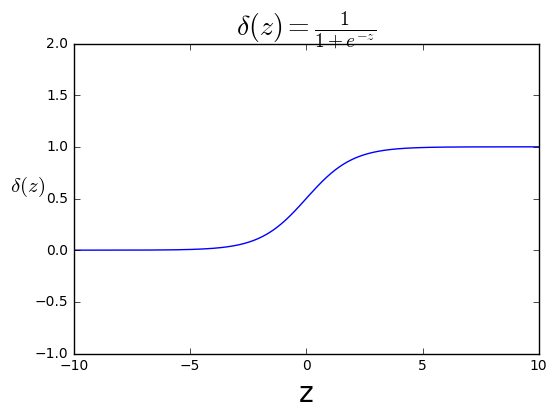

In [4]:
plt.plot(x, [sigmoid(i) for i in x])
plt.ylim(-1, 2)
plt.title('$\delta(z)=\\frac{1}{1+e^{-z}}$', fontsize=20)
plt.xlabel('z', fontsize=20)
plt.ylabel('$\delta(z)$',fontsize=15, rotation='horizontal')

In [5]:
t = symbols('x', real=True)
def sigmoid_derivative(x):
    return diff(1 / (1 + math.e ** (-t)), t, 1).subs(t, x)

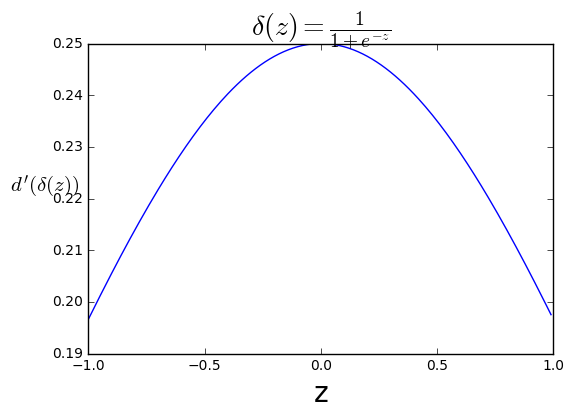

In [6]:
x = np.arange(-1, 1, 0.01)
plt.plot(x, [sigmoid_derivative(i) for i in x])

plt.title('$\delta(z)=\\frac{1}{1+e^{-z}}$', fontsize=20)
plt.xlabel('z', fontsize=20)
plt.ylabel('$d\'(\delta(z))$',fontsize=15, rotation='horizontal')

# binary entropy

In [7]:
t = symbols('x', real=True)
def cross_entropy_with_sigmoid(x, p=1):
    def sigmoid(w):
        return 1 / (1 + math.e ** (-w))
    return diff(-(p * log(sigmoid(t)) + (1-p) * log(1-sigmoid(t))), t, 1).subs(t, x)

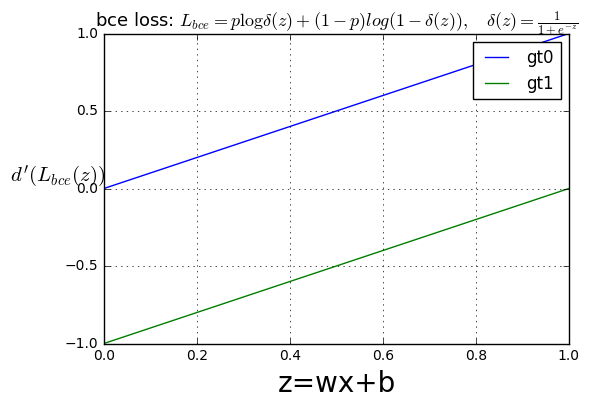

In [8]:
x = np.arange(-10, 10, 0.1)
plt.plot(1 / (1 + math.e ** (-x)), [cross_entropy_with_sigmoid(i, p=0) for i in x], label='gt0')
plt.plot(1 / (1 + math.e ** (-x)), [cross_entropy_with_sigmoid(i, p=1) for i in x], label='gt1')
plt.legend()
plt.grid()
plt.title('bce loss: $L_{bce}=p\log\delta(z)+(1-p)log(1-\delta(z)), \quad \delta(z)=\\frac{1}{1+e^{-z}}$', fontsize=13)
plt.xlabel('z=wx+b', fontsize=20)
plt.ylabel('$d\'(L_{bce}(z))$',fontsize=15, rotation='horizontal')

# Focal loss

In [9]:
t = symbols('x', real=True)
def focalloss_with_sigmoid(x, p=1, alpha=1, gamma=2):
    def sigmoid(w):
        return 1 / (1 + math.e ** (-w))
    return diff(-alpha * (p * log(sigmoid(t)) * (1-sigmoid(t)) ** gamma + (1-p) * log(1-sigmoid(t)) * sigmoid(t) ** gamma), t, 1).subs(t, x)

def focalloss_with_sigmoid_func(t, p=1, alpha=1, gamma=2):
    def sigmoid(w):
        return 1 / (1 + math.e ** (-w))
    return -alpha * (p * log(sigmoid(t)) * (1-sigmoid(t)) ** gamma + (1-p) * log(1-sigmoid(t)) * sigmoid(t) ** gamma)

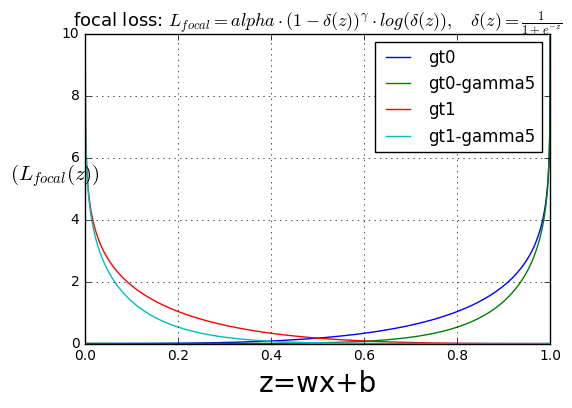

In [10]:
x = np.arange(-10, 10, 0.1)
plt.plot(1 / (1 + math.e ** (-x)), [focalloss_with_sigmoid_func(i, p=0) for i in x], label='gt0')
plt.plot(1 / (1 + math.e ** (-x)), [focalloss_with_sigmoid_func(i, p=0, gamma=5) for i in x], label='gt0-gamma5')
plt.plot(1 / (1 + math.e ** (-x)), [focalloss_with_sigmoid_func(i, p=1) for i in x], label='gt1')
plt.plot(1 / (1 + math.e ** (-x)), [focalloss_with_sigmoid_func(i, p=1, gamma=5) for i in x], label='gt1-gamma5')

plt.legend()
plt.grid()
plt.title('focal loss: $L_{focal}=alpha\cdot(1-\delta(z))^\gamma \cdot log(\delta(z)), \quad \delta(z)=\\frac{1}{1+e^{-z}}$', fontsize=13)
plt.xlabel('z=wx+b', fontsize=20)
plt.ylabel('$(L_{focal}(z))$',fontsize=15, rotation='horizontal')

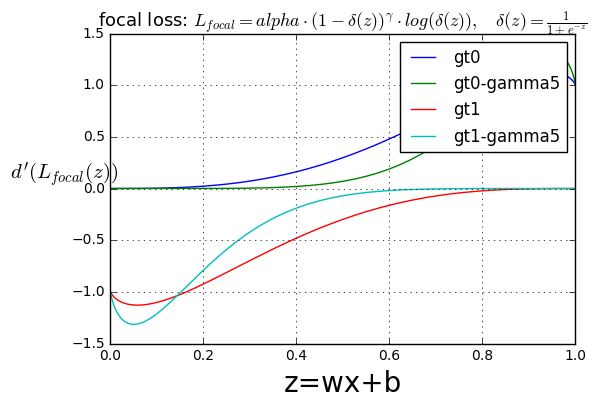

In [11]:
x = np.arange(-10, 10, 0.1)
plt.plot(1 / (1 + math.e ** (-x)), [focalloss_with_sigmoid(i, p=0) for i in x], label='gt0')
plt.plot(1 / (1 + math.e ** (-x)), [focalloss_with_sigmoid(i, p=0, gamma=5) for i in x], label='gt0-gamma5')
plt.plot(1 / (1 + math.e ** (-x)), [focalloss_with_sigmoid(i, p=1) for i in x], label='gt1')
plt.plot(1 / (1 + math.e ** (-x)), [focalloss_with_sigmoid(i, p=1, gamma=5) for i in x], label='gt1-gamma5')

plt.legend()
plt.grid()
plt.title('focal loss: $L_{focal}=alpha\cdot(1-\delta(z))^\gamma \cdot log(\delta(z)), \quad \delta(z)=\\frac{1}{1+e^{-z}}$', fontsize=13)
plt.xlabel('z=wx+b', fontsize=20)
plt.ylabel('$d\'(L_{focal}(z))$',fontsize=15, rotation='horizontal')

# diceloss

In [15]:
t = symbols('x', real=True)
def diceloss_with_sigmoid(x, smooth=0.1, bb=1, y_true=1, alpha=1):
    def sigmoid(x):
        return 1 / (1 + math.e ** (-x))
    intersection = (1 + bb * bb) * y_true * sigmoid(t) + smooth
    union = y_true + sigmoid(t) + smooth * alpha
    return diff(intersection / union, t, 1).subs(t, x)

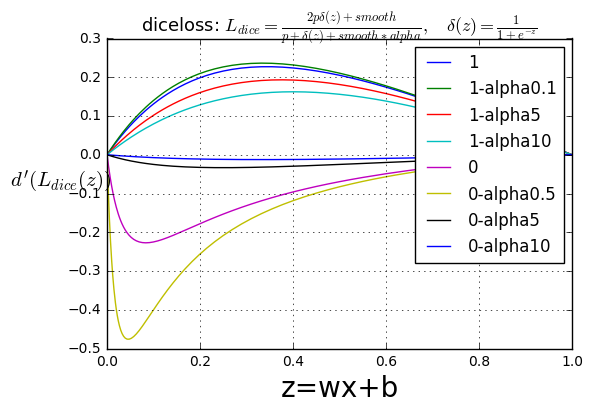

In [16]:
x = np.arange(-10, 10, 0.1)
plt.plot(1 / (1 + math.e ** (-x)), [diceloss_with_sigmoid(i, y_true=1, smooth=0.1) for i in x], label='1')
plt.plot(1 / (1 + math.e ** (-x)), [diceloss_with_sigmoid(i, y_true=1, smooth=0.1, alpha=0.1) for i in x], label='1-alpha0.1')
plt.plot(1 / (1 + math.e ** (-x)), [diceloss_with_sigmoid(i, y_true=1, smooth=0.1, alpha=5) for i in x], label='1-alpha5')
plt.plot(1 / (1 + math.e ** (-x)), [diceloss_with_sigmoid(i, y_true=1, smooth=0.1, alpha=10) for i in x], label='1-alpha10')
plt.plot(1 / (1 + math.e ** (-x)), [diceloss_with_sigmoid(i, y_true=0, smooth=0.1) for i in x], label='0')
plt.plot(1 / (1 + math.e ** (-x)), [diceloss_with_sigmoid(i, y_true=0, smooth=0.1, alpha=0.5) for i in x], label='0-alpha0.5')
plt.plot(1 / (1 + math.e ** (-x)), [diceloss_with_sigmoid(i, y_true=0, smooth=0.1, alpha=5) for i in x], label='0-alpha5')
plt.plot(1 / (1 + math.e ** (-x)), [diceloss_with_sigmoid(i, y_true=0, smooth=0.1, alpha=10) for i in x], label='0-alpha10')
plt.legend()
plt.grid()
plt.title('diceloss: $L_{dice}=\\frac{2p\delta(z) + smooth}{p+\delta(z) + smooth*alpha}, \quad \delta(z)=\\frac{1}{1+e^{-z}}$', fontsize=13)
plt.xlabel('z=wx+b', fontsize=20)
plt.ylabel('$d\'(L_{dice}(z))$',fontsize=15, rotation='horizontal')

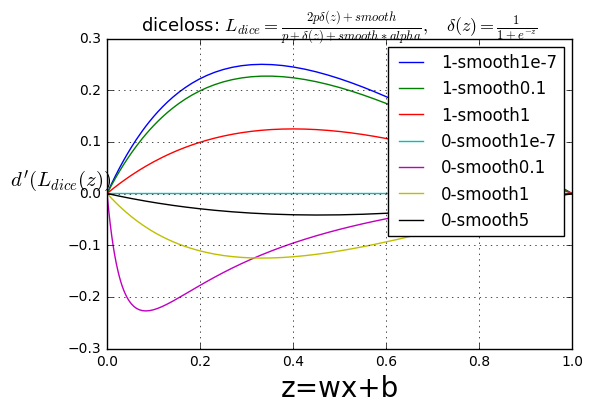

In [17]:
x = np.arange(-10, 10, 0.1)
plt.plot(1 / (1 + math.e ** (-x)), [diceloss_with_sigmoid(i, y_true=1, smooth=1e-7) for i in x], label='1-smooth1e-7')
plt.plot(1 / (1 + math.e ** (-x)), [diceloss_with_sigmoid(i, y_true=1, smooth=0.1) for i in x], label='1-smooth0.1')
plt.plot(1 / (1 + math.e ** (-x)), [diceloss_with_sigmoid(i, y_true=1, smooth=1) for i in x], label='1-smooth1')

plt.plot(1 / (1 + math.e ** (-x)), [diceloss_with_sigmoid(i, y_true=0, smooth=1e-7) for i in x], label='0-smooth1e-7')
plt.plot(1 / (1 + math.e ** (-x)), [diceloss_with_sigmoid(i, y_true=0, smooth=0.1) for i in x], label='0-smooth0.1')
plt.plot(1 / (1 + math.e ** (-x)), [diceloss_with_sigmoid(i, y_true=0, smooth=1) for i in x], label='0-smooth1')
plt.plot(1 / (1 + math.e ** (-x)), [diceloss_with_sigmoid(i, y_true=0, smooth=5) for i in x], label='0-smooth5')

plt.legend()
plt.grid()
plt.title('diceloss: $L_{dice}=\\frac{2p\delta(z) + smooth}{p+\delta(z) + smooth*alpha}, \quad \delta(z)=\\frac{1}{1+e^{-z}}$', fontsize=13)
plt.xlabel('z=wx+b', fontsize=20)
plt.ylabel('$d\'(L_{dice}(z))$',fontsize=15, rotation='horizontal')

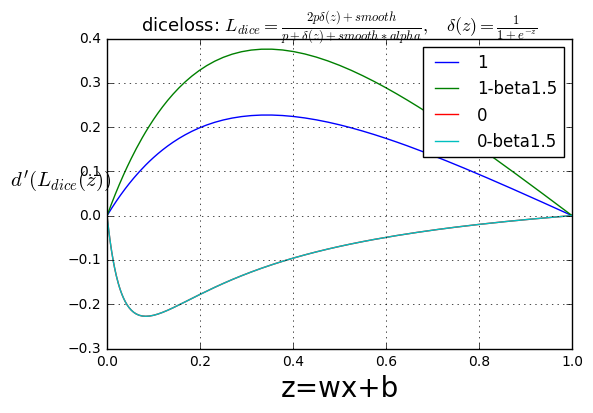

In [26]:
x = np.arange(-10, 10, 0.1)
plt.plot(1 / (1 + math.e ** (-x)), [diceloss_with_sigmoid(i, y_true=1, smooth=0.1) for i in x], label='1')
plt.plot(1 / (1 + math.e ** (-x)), [diceloss_with_sigmoid(i, y_true=1, smooth=0.1, bb=1.5) for i in x], label='1-beta1.5')

plt.plot(1 / (1 + math.e ** (-x)), [diceloss_with_sigmoid(i, y_true=0, smooth=0.1) for i in x], label='0')
plt.plot(1 / (1 + math.e ** (-x)), [diceloss_with_sigmoid(i, y_true=0, smooth=0.1, bb=1.5) for i in x], label='0-beta1.5')

plt.legend()
plt.grid()
plt.title('diceloss: $L_{dice}=\\frac{2p\delta(z) + smooth}{p+\delta(z) + smooth*alpha}, \quad \delta(z)=\\frac{1}{1+e^{-z}}$', fontsize=13)
plt.xlabel('z=wx+b', fontsize=20)
plt.ylabel('$d\'(L_{dice}(z))$',fontsize=15, rotation='horizontal')

# variant

In [15]:
t,gt = symbols('x:2', real=True)
def diceloss_with_sigmoid(x, smooth=0.1, bb=1, alpha=1):
    def sigmoid(x):
        return 1 / (1 + math.e ** (-x))
    intersection = (1 + bb) * gt * sigmoid(t) + smooth
    union = gt + sigmoid(t) + smooth * alpha
    return diff(intersection / union, t, 1).subs(t, x)

def diceloss_with_sigmoid_func(smooth=0.1, bb=1, alpha=1):
    def sigmoid(x):
        return 1 / (1 + math.e ** (-x))
    intersection = (1 + bb) * gt * sigmoid(t) + smooth
    union = gt + sigmoid(t) + smooth * alpha
    return diff(intersection / union, t, 1)

In [16]:
diceloss_with_sigmoid_func(smooth=0)

2.0*2.71828182845905**(-x0)*x1/((1 + 2.71828182845905**(-x0))**2*(x1 + 1/(1 + 2.71828182845905**(-x0)))) - 2.0*2.71828182845905**(-x0)*x1/((1 + 2.71828182845905**(-x0))**3*(x1 + 1/(1 + 2.71828182845905**(-x0)))**2)

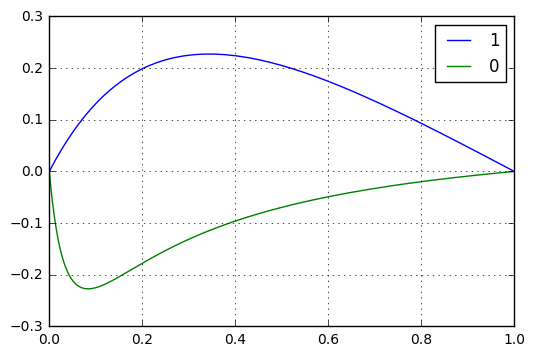

In [19]:
x = np.arange(-10, 10, 0.1)
gt=1
plt.plot(1 / (1 + math.e ** (-x)), [diceloss_with_sigmoid(i, smooth=0.1) for i in x], label='1')
gt=0
plt.plot(1 / (1 + math.e ** (-x)), [diceloss_with_sigmoid(i, smooth=0.1) for i in x], label='0')

plt.legend()
plt.grid()

In [20]:
t = symbols('x', real=True)
def diceloss_with_sigmoid(smooth=0, bb=1, y_true=1):
    def sigmoid(x):
        return x
    intersection = (1 + bb) * y_true * sigmoid(t) + smooth
    union = y_true + sigmoid(t) + smooth
    return diff(intersection / union, t, 1)

In [21]:
print(diceloss_with_sigmoid())

-2*x/(x + 1)**2 + 2/(x + 1)


In [22]:
# limit
x = Symbol("x")
print(limit(sin(x)/x, x, 0))
print(limit(sin(x * x)/x, x, 0))

1
0
